In [3]:
# Ref: https://www.kaggle.com/roshansharma/online-shopper-s-intention

In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('raw-data/online_shoppers_intention.csv')
df.shape

(12330, 18)

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [44]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [45]:
len(df.dtypes)

18

In [11]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Displays the descriptive statistics for all the columns, including the categorical columns
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
# Number of unique elements in each column
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

# -------------------------------- Uni-Variate Analysis of the Data --------------------------------


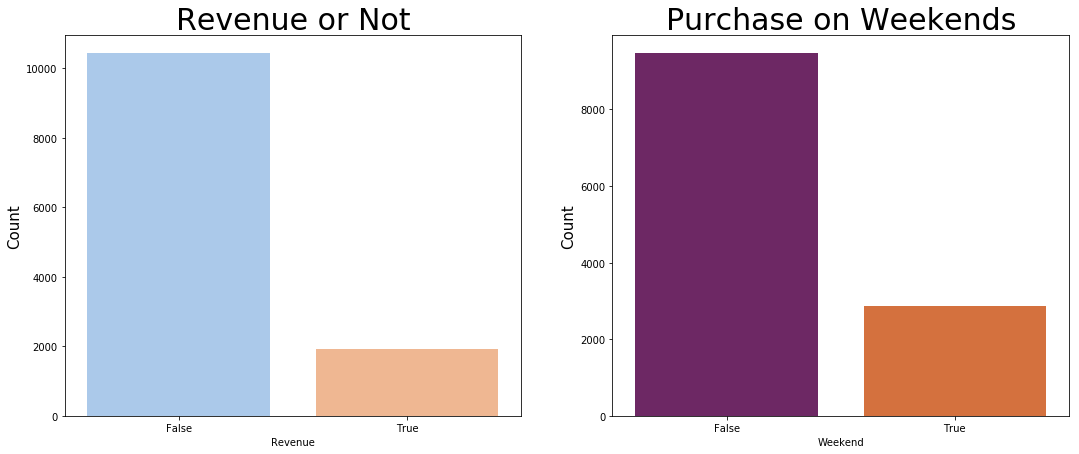

In [8]:
plt.rcParams['figure.figsize'] = (18, 7)

# Distribution of customers on Revenue
plt.subplot(1, 2, 1)

# df['Revenue'].value_counts().plot.bar(title='Revenue or Not')

sns.countplot(df['Revenue'], palette = 'pastel')
plt.title('Revenue or Not', fontsize = 30)
# plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


# Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
# plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

In [42]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

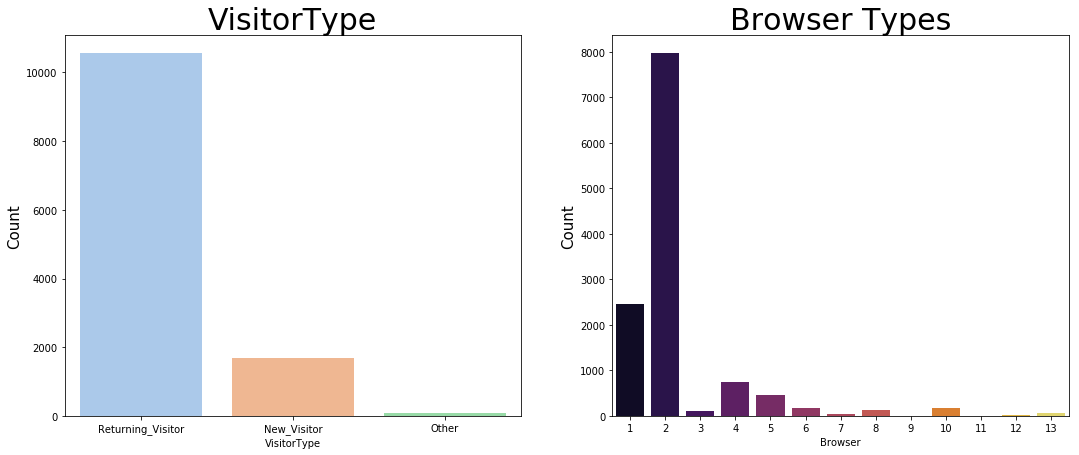

In [35]:
plt.rcParams['figure.figsize'] = (18, 7)

# Distribution of VisitorType
plt.subplot(1, 2, 1)
sns.countplot(df['VisitorType'], palette = 'pastel')
plt.title('VisitorType', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


# Distribution of Browser
plt.subplot(1, 2, 2)
sns.countplot(df['Browser'], palette = 'inferno')
plt.title('Browser Types', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


plt.show()

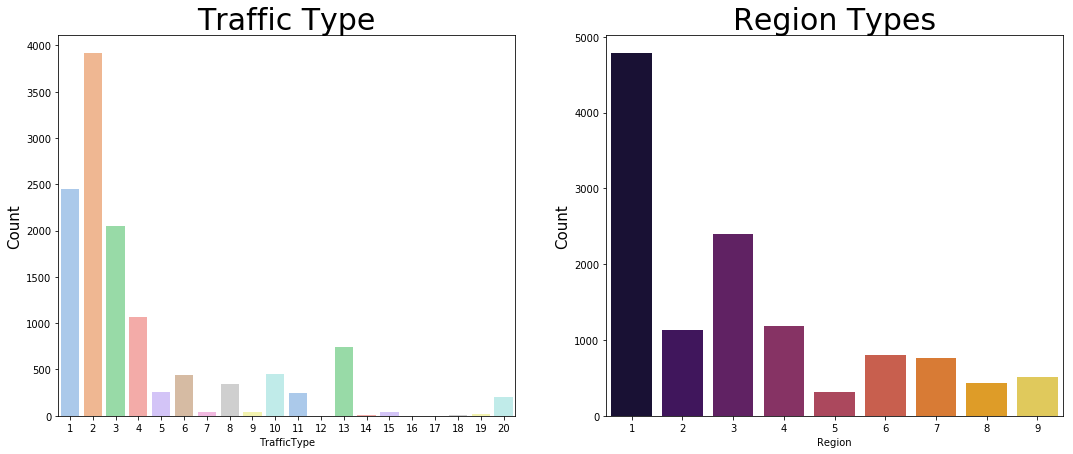

In [47]:
plt.rcParams['figure.figsize'] = (18, 7)


plt.subplot(1, 2, 1)
sns.countplot(df['TrafficType'], palette = 'pastel')
plt.title('Traffic Type', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


plt.subplot(1, 2, 2)
sns.countplot(df['Region'], palette = 'inferno')
plt.title('Region Types', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


plt.show()

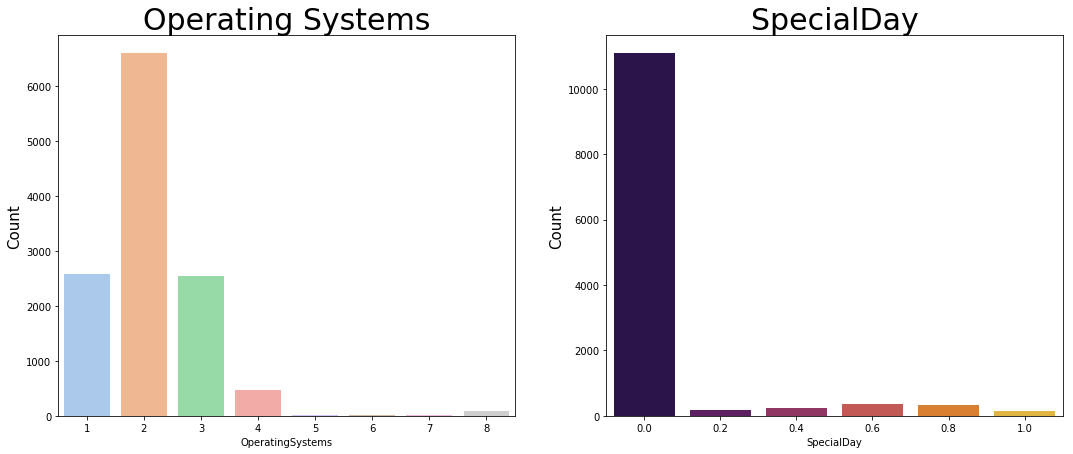

In [49]:
plt.rcParams['figure.figsize'] = (18, 7)


plt.subplot(1, 2, 1)
sns.countplot(df['OperatingSystems'], palette = 'pastel')
plt.title('Operating Systems', fontsize = 30)
plt.ylabel('Count', fontsize = 15)



plt.subplot(1, 2, 2)
sns.countplot(df['SpecialDay'], palette = 'inferno')
plt.title('SpecialDay', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


plt.show()

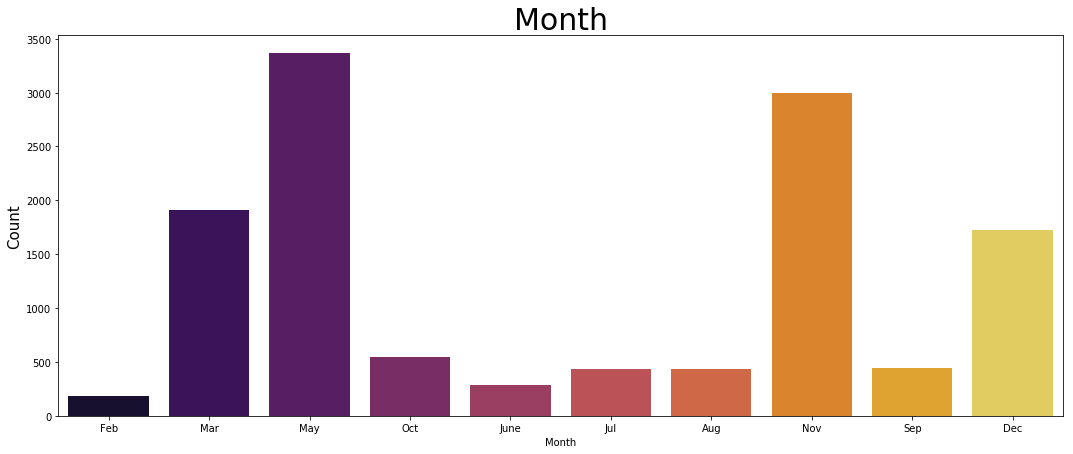

In [50]:
sns.countplot(df['Month'], palette = 'inferno')
plt.title('Month', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


plt.show()

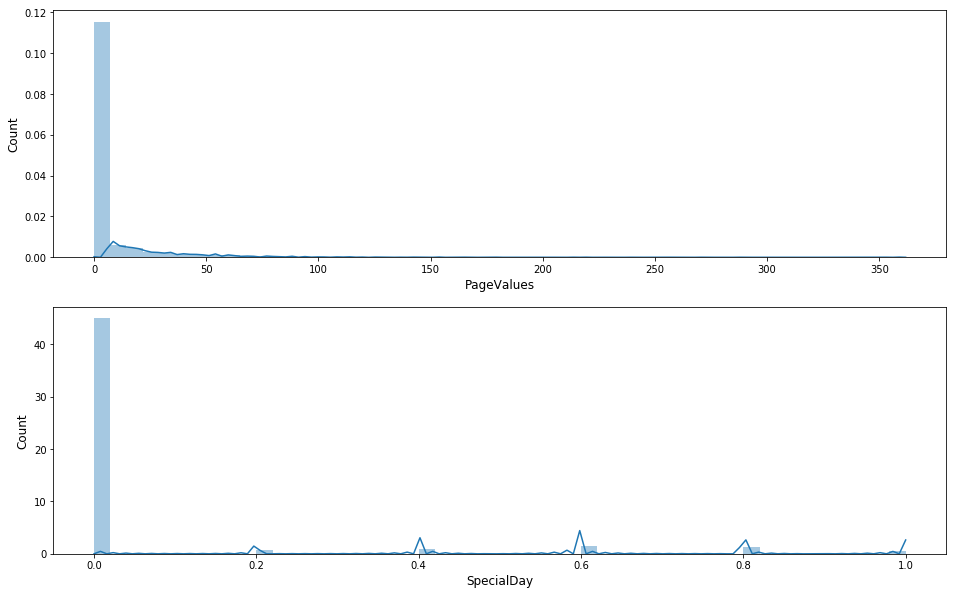

In [9]:
# ------------------- Numerical
# Administrative             float64
# Administrative_Duration    float64
# Informational              float64
# Informational_Duration     float64
# ProductRelated             float64
# ProductRelated_Duration    float64
# BounceRates                float64
# ExitRates                  float64
# PageValues                 float64
# SpecialDay                 float64


num_col_names = [
#              'Administrative','Administrative_Duration', 
#              'Informational', 'Informational_Duration', 
#              'ProductRelated', 'ProductRelated_Duration',
#              'BounceRates', 'ExitRates',
             'PageValues', 'SpecialDay']

fig, ax = plt.subplots(len(num_col_names), figsize=(16, 5*len(num_col_names)))

for i, col_val in enumerate(num_col_names):
    sns.distplot(df[col_val], hist=True, ax=ax[i])
#     ax[i].set_title('Freq Dist - '+ col_val, fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

plt.show()

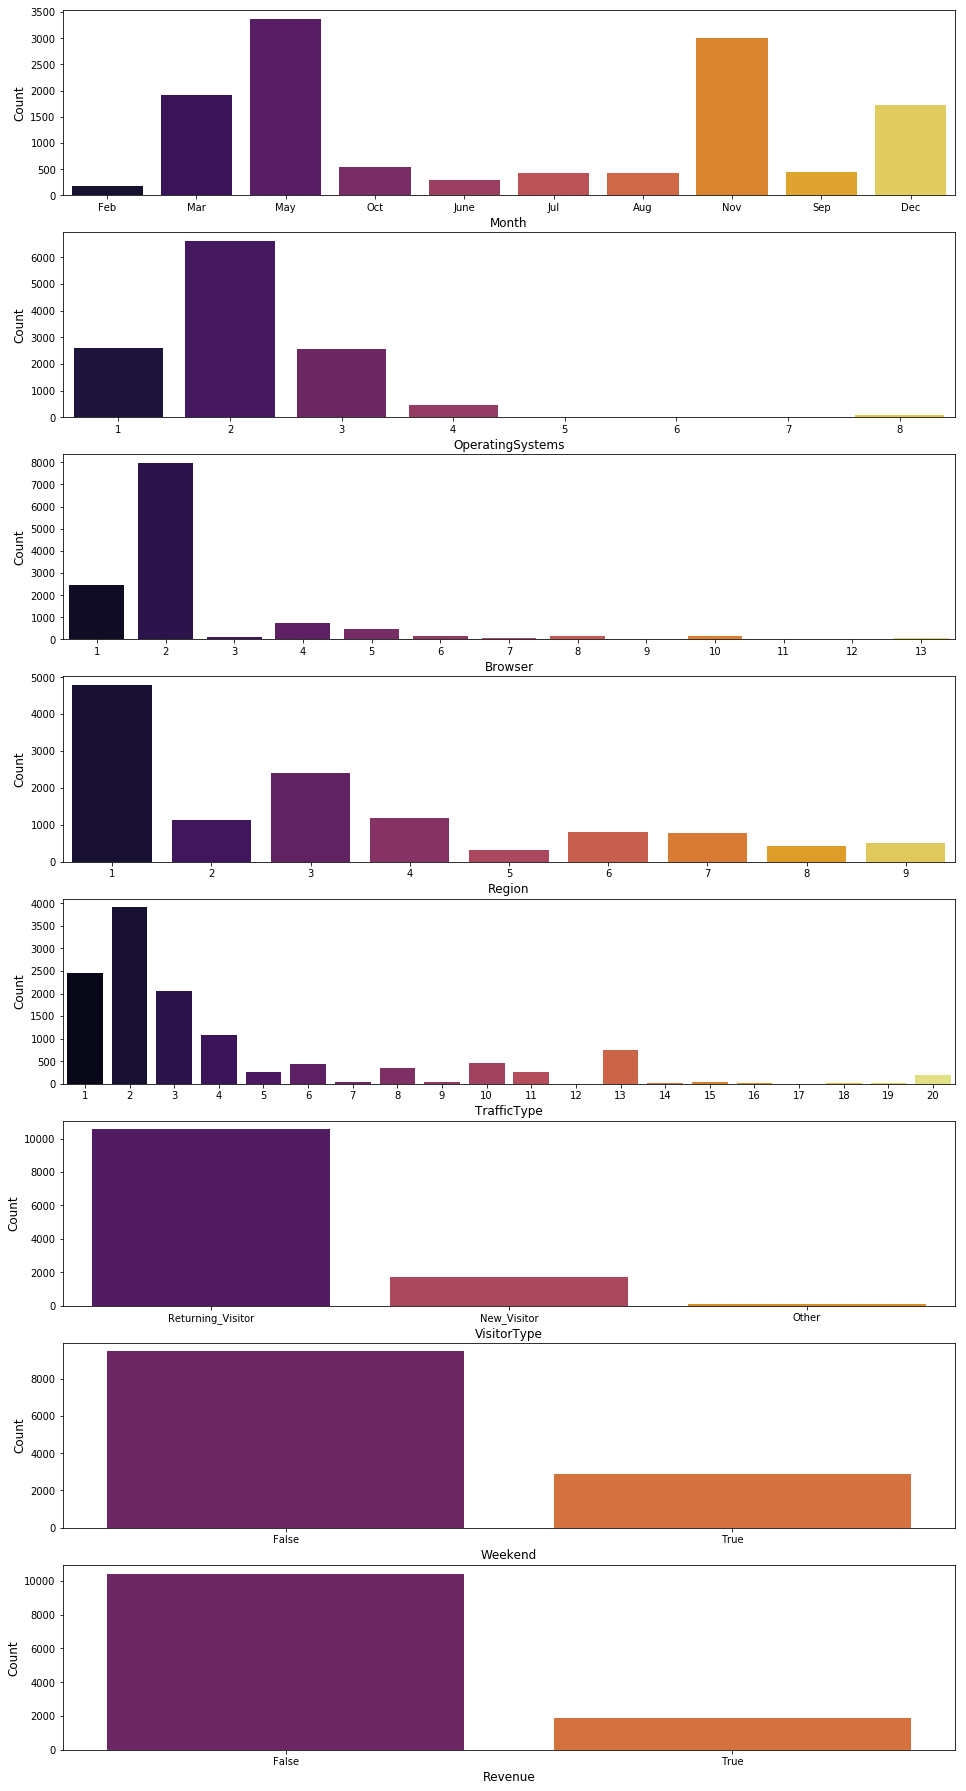

In [11]:
# ------------------- Categorical
# Month                       object
# OperatingSystems             int64
# Browser                      int64
# Region                       int64
# TrafficType                  int64
# VisitorType                 object
# Weekend                       bool
# Revenue                       bool

cat_col_names = [
             'Month', 'OperatingSystems', 
             'Browser', 'Region', 
             'TrafficType', 'VisitorType',
             'Weekend', 'Revenue']

fig, ax = plt.subplots(len(cat_col_names), figsize=(16, 4*len(cat_col_names)))

for i, col_val in enumerate(cat_col_names):
    sns.countplot(df[col_val], palette = 'inferno', ax=ax[i])
#     ax[i].set_title('Freq Dist - '+ col_val, fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

plt.show()

# -------------------------------- Bi-Variate Analysis of the Data --------------------------------

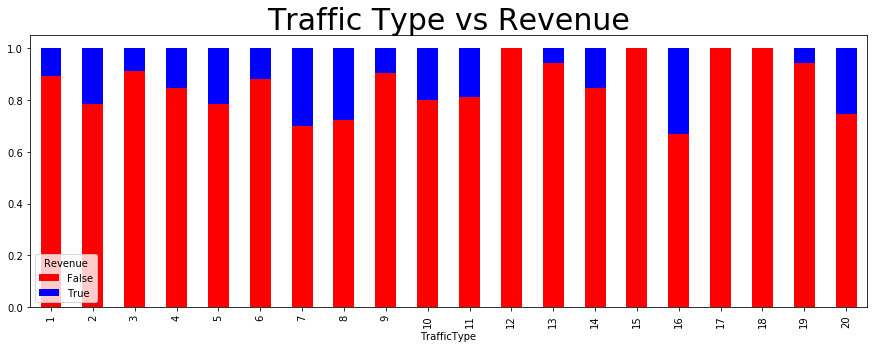

In [54]:
# Traffic Type vs Revenue
temp_df = pd.crosstab(df['TrafficType'], df['Revenue'])
temp_df.div(temp_df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['red', 'blue'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

In [55]:
temp_df

Revenue,False,True
TrafficType,,
1,2189,262
2,3066,847
3,1872,180
4,904,165
5,204,56
6,391,53
7,28,12
8,248,95
9,38,4


In [56]:
temp_df.div(temp_df.sum(1).astype(float), axis = 0)

Revenue,False,True
TrafficType,,
1,0.893105,0.106895
2,0.783542,0.216458
3,0.912281,0.087719
4,0.845650,0.154350
5,0.784615,0.215385
6,0.880631,0.119369
7,0.700000,0.300000
8,0.723032,0.276968
9,0.904762,0.095238


In [46]:
# ------------------- Numerical
# Administrative             float64
# Administrative_Duration    float64
# Informational              float64
# Informational_Duration     float64
# ProductRelated             float64
# ProductRelated_Duration    float64
# BounceRates                float64
# ExitRates                  float64
# PageValues                 float64
# SpecialDay                 float64


# ------------------- Categorical
# Month                       object
# OperatingSystems             int64
# Browser                      int64
# Region                       int64
# TrafficType                  int64
# VisitorType                 object
# Weekend                       bool
# Revenue                       bool

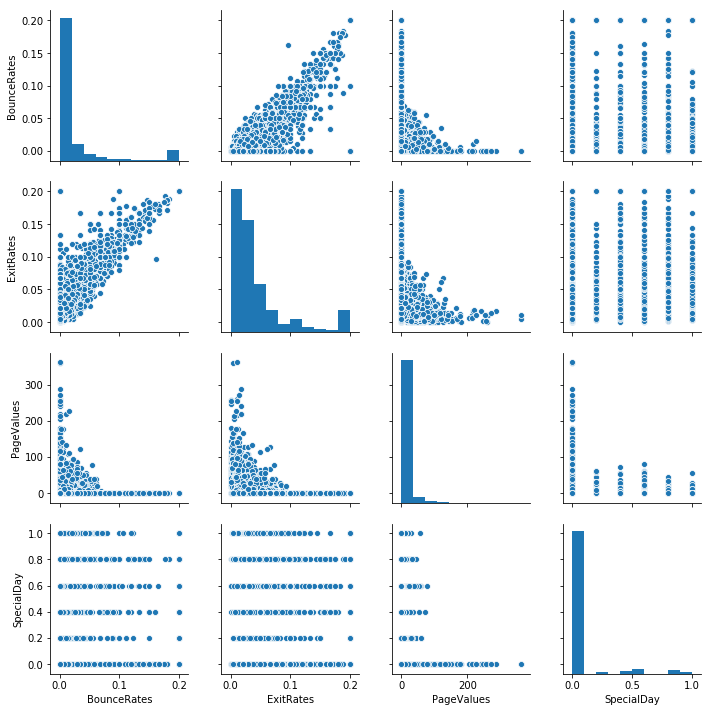

In [20]:
pair_plot_df = df[[
#              'Administrative','Administrative_Duration', 
#              'Informational', 'Informational_Duration', 
#              'ProductRelated', 'ProductRelated_Duration',  
             'BounceRates', 'ExitRates',
             'PageValues', 'SpecialDay']]
sns.pairplot(pair_plot_df)
